# FTR

## Section 1

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np
import scipy.stats as stats
import math

N = 1000
no_bins = 60

In [2]:
def probability_of_band(x_1,x_2):
    return stats.norm.cdf(x_2) - stats.norm.cdf(x_1)

In [3]:
def mean_of_band(x_1,x_2,n_j):
    return probability_of_band(x_1,x_2) * n_j

In [4]:
def std_of_band(x_1,x_2,n_j, no_bins=60):
    p_j = probability_of_band(x_1, x_2)
    variance = n_j * p_j * (1 - p_j)
    std = np.sqrt(variance)
    return std, variance

In [5]:
def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.):  # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob]  # each row is one x value
        return np.array(pdf)
    return ksd

In [6]:
def plot_for_N(N):
    norm = np.random.randn(N)
    fig, ax = plt.subplots(1,figsize=(12, 6))

    # Gausian parameters
    mu = 0
    variance = 1
    sigma = math.sqrt(variance)
    x_norm = np.linspace(mu-5*sigma, mu+5*sigma, N)

    # scaled 
    no_bins = 60
    bin_width = (max(norm)-min(norm))/no_bins

    ax.hist(norm, bins=no_bins, label='Histogram') 


    # Plotting theoretical mean
    hist = np.histogram(norm,bins=no_bins)
    total_mean = 0
    total_variance = 0

    for i,x_1 in enumerate(hist[1][:-1]):
        x_2 = hist[1][i+1]
        n_j = hist[0][i] 
        total_mean += mean_of_band(x_1,x_2,n_j)

        # mean of bin
        bin_mean = probability_of_band(x_1,x_2)*N
        ax.plot(np.linspace(x_1,x_2,10), [bin_mean]*10, color='orange')

        # std of bin
        bin_std, bin_variance = std_of_band(x_1,x_2, N)
        ax.plot(np.linspace(x_1,x_2,10), [bin_mean+3*bin_std]*10, color='r')
        ax.plot(np.linspace(x_1,x_2,10), [bin_mean-3*bin_std]*10, color='r')
        total_variance += bin_variance/no_bins

    total_std = np.sqrt(total_variance)
    ax.plot(x_norm,[total_mean + 3*total_std]*x_norm.size, color='r')
    ax.plot(x_norm,[total_mean - 3*total_std]*x_norm.size, color='r')

    ax.plot(x_norm,[total_mean]*x_norm.size, color='orange', label='Histogram Theoretical mean')


    # legend 
    handles, labels = ax.get_legend_handles_labels()
    line1 = Line2D([], [], color='orange', label='Bin Theoretical mean')
    line2 = Line2D([], [], color='r', label='Bin $\pm$ 3 stdv')
    line3 = Line2D([], [], color='r', label='Histogram $\pm$ 3 stdv') 
    [handles.append(line) for line in [line3,line1,line2]]
    ax.legend(handles=handles, loc='upper right')
    ax.set_title('Plot with {} random variables'.format(N))
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')
    
    plt.savefig('FTR_plots/plot_N_{}.png'.format(N))
    fig.show()

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


[None, None, None]

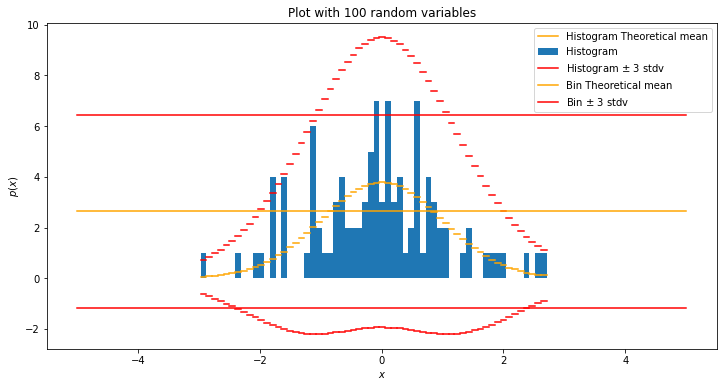

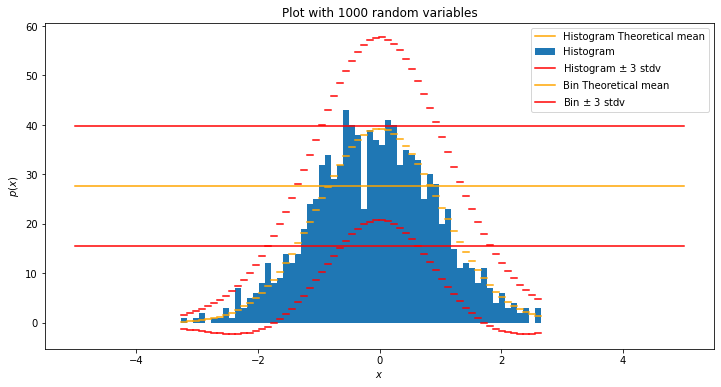

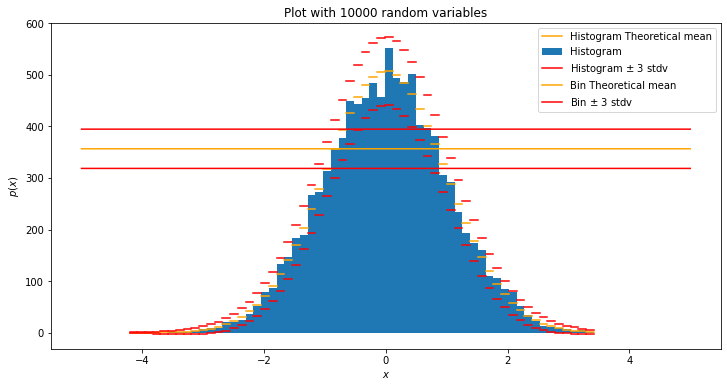

In [7]:
[plot_for_N(n) for n in [100,1000,10000]]

 We can see that for the larger values of $N$ that the bin standard deviation decreases as a proportion of the bin theoretical mean. 
 
 We can also see that the histogram variance from the histogram theoretical mean is largest around the mean value of $x$, and as $x$ tends to $\pm \infty$. These values correspond to when $p_j$ are nearest to 1, and 0.
 
 We can see that at the intermediate values of $x$, near to $\pm \sigma$ (the stdv of the Gaussian distributed x values), the variance from the theoretical mean of the histogram is at its minimum.  
 

## Section 2

In [8]:
x = np.random.rand(N)*2*math.pi

In [9]:
def f(x):
    return np.sin(x)

In [10]:
def p_x(x):
    if x < 2*math.pi and x > 0:
        return 1/(2*math.pi)
    else:
        return 0

In [11]:
def p_y(y):
    frac1 = p_x(np.arcsin(y))/abs(np.cos(np.arcsin(y)))
    frac2 = p_x(math.pi - np.arcsin(y))/abs(np.cos(math.pi - np.arcsin(y)))
    frac3 = p_x(2*math.pi + np.arcsin(y))/abs(np.cos(2*math.pi + np.arcsin(y)))
    return frac1+frac2+frac3

In [12]:
x_ = np.linspace(-0.99999,0.99999,500000)
y_ = []
for x in x_:
    y_.append(p_y(x))
    
y_ = np.array(y_)

integral = np.sum(y_*((max(x_)-min(x_))/x_.size))
print('''If this p(y) is correct, it must first integrate to 1.\n
        Integral p(y) dy = {}'''.format(integral))

If this p(y) is correct, it must first integrate to 1.

        Integral p(y) dy = 0.997445056137818


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


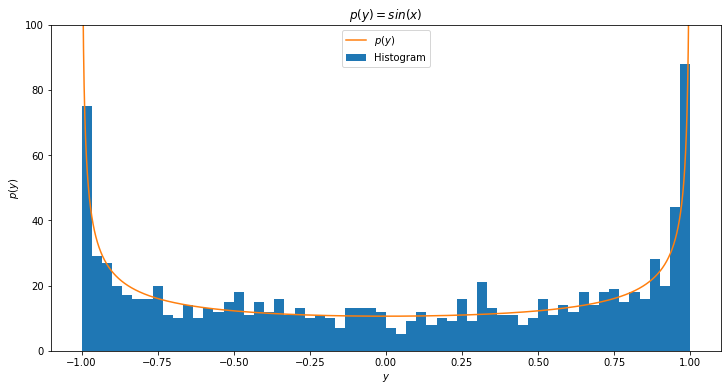

In [13]:
x = np.random.rand(N)*2*math.pi
y = f(x)

fig, ax = plt.subplots(1,figsize=(12, 6))
ax.hist(y,bins=no_bins,label='Histogram')

ax.plot(x_,y_*N*(max(y)-min(y))/no_bins, label='$p(y)$')
ax.set_ylim(0,100)
ax.legend()
ax.set_title('$p(y) = sin(x)$')
ax.set_xlabel('$y$')
ax.set_ylabel('$p(y)$')
fig.savefig('FTR_plots/f_x_sin_x.png')
fig.show()

In [14]:
def f(x):
    return np.minimum(np.sin(x), 0.7)

In [15]:
x_ = np.linspace(-0.99999,0.99999,500)
bin_width = (max(x_) - min(x_))/no_bins

def p_y(y):
    
    if y < 0.7:
        frac1 = p_x(np.arcsin(y))/abs(np.cos(np.arcsin(y)))
        frac2 = p_x(math.pi - np.arcsin(y))/abs(np.cos(math.pi - np.arcsin(y)))
        frac3 = p_x(2*math.pi + np.arcsin(y))/abs(np.cos(2*math.pi + np.arcsin(y)))
        return frac1+frac2+frac3
    else:
        return 10000000000000000000000000 #arbitary large number

In [16]:
y_ = []
for x in x_:
    y_.append(p_y(x))
    
y_ = np.array(y_)

left_index = np.argmax(y_)
print(left_index)
integral = np.sum(y_[:left_index]*((max(x_)-min(x_))/x_.size))
print('''If this p(y) is correct, it must first integrate to 1.\n
        Integral p(y) dy = {}'''.format(integral))

425
If this p(y) is correct, it must first integrate to 1.

        Integral p(y) dy = 1.0098301141986208


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


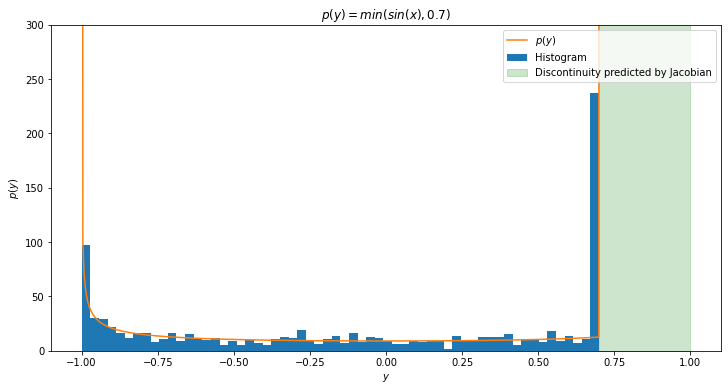

In [17]:
x = np.random.rand(N)*2*math.pi
y = f(x)

fig, ax = plt.subplots(1,figsize=(12, 6))

ax.fill_between(np.linspace(0.7, 1,100), 0, [300]*100, color='g', alpha=0.2, label='Discontinuity predicted by Jacobian')
ax.hist(y,bins=no_bins, label='Histogram')
ax.plot(x_,y_*N*(max(y)-min(y))/no_bins, label='$p(y)$')
ax.legend()
ax.set_ylim(0,300)
ax.set_xlabel('$y$')
ax.set_ylabel('$p(y)$')
ax.set_title('$p(y) = min(sin(x),0.7)$')
fig.show()
fig.savefig('FTR_plots/f_x_min_sin_x_0_7.png')

## Section 3

Text(0.5, 1.0, 'Samples from the exponential distribution')

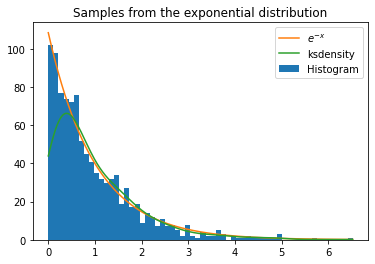

In [18]:
x = np.random.rand(N)

def inverse_F(x):
    return np.log(1/(1-x))

y = inverse_F(x)

plt.hist(y,bins=no_bins,label='Histogram')

def p(y):
    return np.exp(-y)

rescale_factor = (max(y)-min(y))/no_bins

x_ax = np.linspace(min(y),max(y),N)
plt.plot(x_ax,p(x_ax)*N*rescale_factor,label='$e^{-x}$')

ks_density = ksdensity(y)
plt.plot(x_ax,ks_density(x_ax)*N*rescale_factor,label='ksdensity')
plt.legend()
plt.title('Samples from the exponential distribution')
# plt.savefig('FTR_plots/inverse_CFD_method.png')